## Run this notebook if you want to locally create the detector.

## Load Libraries

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from Utils import plot_confusion_matrix

## Load the dataset

In [2]:
url = "https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/dataset_small.csv"
print("Loading dataset...")
df = pd.read_csv(url)
print("✅ Loaded. Shape:", df.shape)
print("Label counts:\n", df['phishing'].value_counts())

Loading dataset...
✅ Loaded. Shape: (58645, 112)
Label counts:
 phishing
1    30647
0    27998
Name: count, dtype: int64


## Train-Test Split

In [7]:
# 2️⃣ Separate features and label
X = df.drop(columns=['phishing'])
y = df['phishing'].astype(int)

# 3️⃣ Handle missing values (if any)
imp = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# 4️⃣ Train/test split
X_train, X_test, y_train, y_true = train_test_split(
    X_imp, y, test_size=0.2, random_state=42, stratify=y
)

## Train the model

In [4]:
print("Training RandomForest model...")
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

Training RandomForest model...


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate the performance


Accuracy: 0.9573706198311877

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      5600
           1       0.96      0.96      0.96      6129

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729


✅ Accuracy: 0.9574

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      5600
           1       0.96      0.96      0.96      6129

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



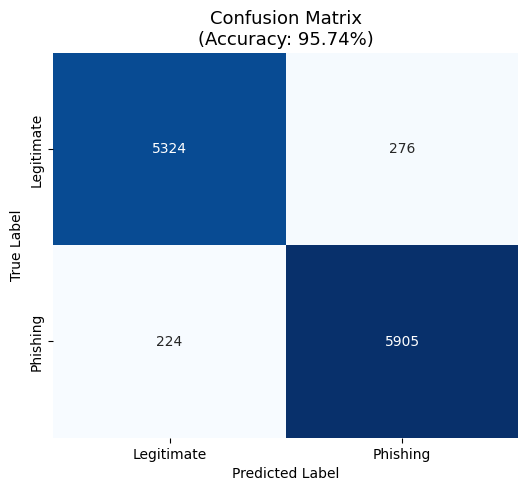

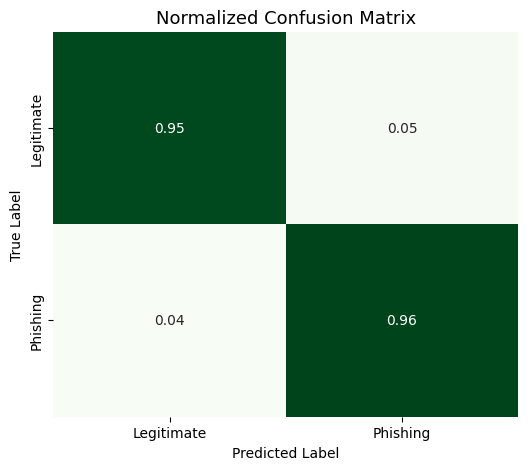

In [5]:
y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
plot_confusion_matrix(y_true=y_true, y_pred=y_pred, labels=["Legitimate", "Phishing"])

## Save model bundle for Flask

In [6]:
bundle = {
    'model': clf,
    'imputer': imp,
    'feature_cols': X.columns.tolist()
}
joblib.dump(bundle, 'phish_model_bundle.pkl')
print("\nModel saved as phish_model_bundle.pkl")




Model saved as phish_model_bundle.pkl
